In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/historical-energy-consumption-by-indian-states/long_data.csv


In [5]:
df = pd.read_excel('/kaggle/input/sample-energy-consumption-1-day/dsn_sample_dataset.xlsx')
df.head()

,States,Regions,latitude,longitude,Dates,Usage
0,Punjab,NR,31.519974,75.980003,2019-01-02,119.9
1,Haryana,NR,28.450006,77.019991,2019-01-02,130.3
2,Rajasthan,NR,26.449999,74.639981,2019-01-02,234.1
3,Delhi,NR,28.669993,77.230004,2019-01-02,85.8
4,UP,NR,27.599981,78.050006,2019-01-02,313.9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   States     33 non-null     object        
 1   Regions    33 non-null     object        
 2   latitude   33 non-null     float64       
 3   longitude  33 non-null     float64       
 4   Dates      33 non-null     datetime64[ns]
 5   Usage      33 non-null     float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 1.7+ KB


In [7]:
# Convert dtype of 'Dates' column to datetime
df['Dates'] = pd.to_datetime(df['Dates'], format="%d/%m/%Y %H:%M:%S")

# Add day of the week column
df['DayOfWeek'] = df['Dates'].dt.dayofweek

# Add month column
df['Month'] = df['Dates'].dt.month
df.sample(10)

,States,Regions,latitude,longitude,Dates,Usage,DayOfWeek,Month
30,Mizoram,NER,23.710399,92.720015,2019-01-02,1.9,2,1
0,Punjab,NR,31.519974,75.980003,2019-01-02,119.9,2,1
2,Rajasthan,NR,26.449999,74.639981,2019-01-02,234.1,2,1
26,Arunachal Pradesh,NER,27.100399,93.616601,2019-01-02,2.1,2,1
27,Assam,NER,26.749981,94.216667,2019-01-02,21.7,2,1
25,Sikkim,ER,27.333330,88.616647,2019-01-02,2.0,2,1
8,Chandigarh,NR,30.719997,76.780006,2019-01-02,5.0,2,1
7,J&K,NR,33.450000,76.240000,2019-01-02,52.5,2,1
31,Nagaland,NER,25.666998,94.116570,2019-01-02,2.2,2,1
24,West Bengal,ER,22.580390,88.329947,2019-01-02,108.2,2,1


In [8]:
population_density_dict = {
    "Punjab": 551, "Haryana": 573, "Rajasthan": 201, "Delhi": 11297, "UP": 828,
    "Uttarakhand": 189, "HP": 123, "J&K": 297, "Chandigarh": 350, "Chhattisgarh": 189,
    "Gujarat": 308, "MP": 236, "Maharashtra": 365, "Goa": 394, "DNH": 970,
    "Andhra Pradesh": 303, "Telangana": 312, "Karnataka": 319, "Kerala": 859,
    "Tamil Nadu": 555, "Pondy": 2598, "Bihar": 1106, "Jharkhand": 414, "Odisha": 269,
    "West Bengal": 1028, "Sikkim": 86, "Arunachal Pradesh": 17, "Assam": 398,
    "Manipur": 122, "Meghalaya": 132, "Mizoram": 52, "Nagaland": 119, "Tripura": 350
}

df['PopulationDensity'] = df['States'].map(population_density_dict)

df.head(33)

,States,Regions,latitude,longitude,Dates,Usage,DayOfWeek,Month,PopulationDensity
0,Punjab,NR,31.519974,75.980003,2019-01-02,119.9,2,1,551
1,Haryana,NR,28.450006,77.019991,2019-01-02,130.3,2,1,573
2,Rajasthan,NR,26.449999,74.639981,2019-01-02,234.1,2,1,201
3,Delhi,NR,28.669993,77.230004,2019-01-02,85.8,2,1,11297
4,UP,NR,27.599981,78.050006,2019-01-02,313.9,2,1,828
5,Uttarakhand,NR,30.320409,78.050006,2019-01-02,40.7,2,1,189
6,HP,NR,31.100025,77.166597,2019-01-02,30.0,2,1,123
7,J&K,NR,33.450000,76.240000,2019-01-02,52.5,2,1,297
8,Chandigarh,NR,30.719997,76.780006,2019-01-02,5.0,2,1,350
9,Chhattisgarh,WR,22.090420,82.159987,2019-01-02,78.7,2,1,189


In [9]:
df.to_csv('short-energy-consumption-1-day', index=False)

In [10]:
df['Regions'].unique()

array(['NR', 'WR', 'SR', 'ER', 'NER'], dtype=object)

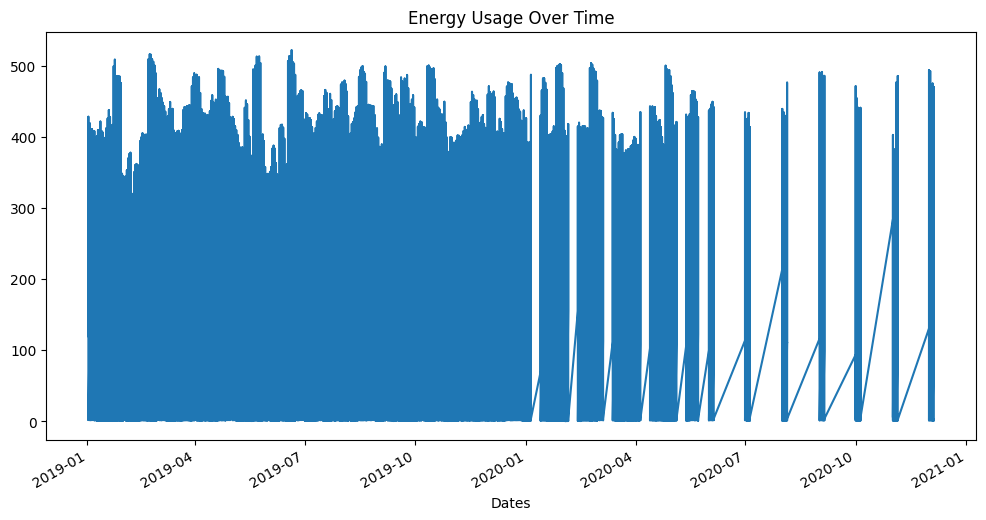

In [6]:
# Check energy usage over time
plt.figure(figsize=(12, 6))
df.set_index('Dates')['Usage'].plot(figsize=(12, 6), title="Energy Usage Over Time")
plt.show()

In [7]:
# Convert columns to categorical dtype
categorical_cols = ['States', 'Regions']
for col in categorical_cols:
    df[col] = df[col].astype('category')

In [8]:
df_encoded = pd.get_dummies(df, columns=['States', 'Regions'], drop_first=True)
df_encoded.head()
len(df_encoded.columns)

43

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16599 entries, 0 to 16598
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   States             16599 non-null  category      
 1   Regions            16599 non-null  category      
 2   latitude           16599 non-null  float64       
 3   longitude          16599 non-null  float64       
 4   Dates              16599 non-null  datetime64[ns]
 5   Usage              16599 non-null  float64       
 6   DayOfWeek          16599 non-null  int32         
 7   Month              16599 non-null  int32         
 8   PopulationDensity  16599 non-null  int64         
dtypes: category(2), datetime64[ns](1), float64(3), int32(2), int64(1)
memory usage: 812.1 KB


In [10]:
# Correlation of Features with Usage
numerical_features = df_encoded.select_dtypes(include=['float64', 'int64']).columns
usage_corr_matrix = df_encoded[numerical_features].corr()
print("Correlation Table: Usage vs Other Columns\n")
print(usage_corr_matrix['Usage'].sort_values(ascending=False))

Correlation Table: Usage vs Other Columns

Usage                1.000000
PopulationDensity   -0.026520
latitude            -0.253823
longitude           -0.525028
Name: Usage, dtype: float64


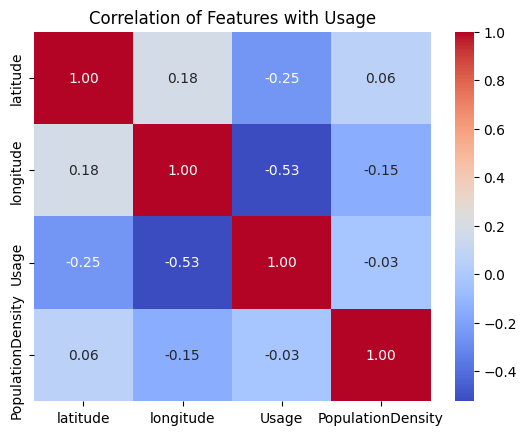

In [11]:
# Check correlations
sns.heatmap(usage_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation of Features with Usage")
plt.show()

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# Normalize the numerical column
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

In [13]:
# Creating lagged features to make the data suitable for sequence modeling:

for lag in range(1, 4):
    df_encoded[f'lag_{lag}'] = df_encoded['Usage'].shift(lag)

# Drop rows with NaN values created by lagging
df_encoded.dropna(inplace=True)
df_encoded.head()

,latitude,longitude,Dates,Usage,DayOfWeek,Month,PopulationDensity,States_Arunachal Pradesh,States_Assam,States_Bihar,...,States_UP,States_Uttarakhand,States_West Bengal,Regions_NER,Regions_NR,Regions_SR,Regions_WR,lag_1,lag_2,lag_3
3,0.805292,0.262228,2019-01-02,0.163856,2,1,1.000000,False,False,False,...,False,False,False,False,True,False,False,0.448064,0.249138,0.229207
4,0.761706,0.297843,2019-01-02,0.600997,2,1,0.071897,False,False,False,...,True,False,False,False,True,False,False,0.163856,0.448064,0.249138
5,0.872520,0.297843,2019-01-02,0.077424,2,1,0.015248,False,False,False,...,False,True,False,False,True,False,False,0.600997,0.163856,0.448064
6,0.904277,0.259474,2019-01-02,0.056918,2,1,0.009397,False,False,False,...,False,False,False,False,True,False,False,0.077424,0.600997,0.163856
7,1.000000,0.219230,2019-01-02,0.100038,2,1,0.024823,False,False,False,...,False,False,False,False,True,False,False,0.056918,0.077424,0.600997


In [14]:
# Add rolling statistics for smoothing and trends
df_encoded['Usage_Rolling_Mean'] = df_encoded['Usage'].rolling(window=7).mean()
df_encoded['Usage_Rolling_Max'] = df_encoded['Usage'].rolling(window=7).max()

# Drop rows with NaN values created by rolling
df_encoded.dropna(inplace=True)
df_encoded.head()

,latitude,longitude,Dates,Usage,DayOfWeek,Month,PopulationDensity,States_Arunachal Pradesh,States_Assam,States_Bihar,...,States_West Bengal,Regions_NER,Regions_NR,Regions_SR,Regions_WR,lag_1,lag_2,lag_3,Usage_Rolling_Mean,Usage_Rolling_Max
9,0.537281,0.476349,2019-01-02,0.150249,2,1,0.015248,False,False,False,...,False,False,False,False,True,0.009007,0.100038,0.056918,0.165499,0.600997
10,0.544136,0.000000,2019-01-02,0.611729,2,1,0.025798,False,False,False,...,False,False,False,False,True,0.150249,0.009007,0.100038,0.229480,0.611729
11,0.505100,0.214453,2019-01-02,0.484285,2,1,0.019415,False,False,False,...,False,False,False,False,True,0.611729,0.150249,0.009007,0.212807,0.611729
12,0.421589,0.085465,2019-01-02,0.820813,2,1,0.030851,False,False,False,...,False,False,False,False,True,0.484285,0.611729,0.150249,0.319006,0.820813
13,0.268502,0.114036,2019-01-02,0.023956,2,1,0.033422,False,False,False,...,False,False,False,False,True,0.820813,0.484285,0.611729,0.314297,0.820813


In [21]:
df_encoded = df_encoded.drop(columns=['index'])
df_encoded.reset_index(drop=True)
df_encoded.head()

,latitude,longitude,Dates,Usage,DayOfWeek,Month,PopulationDensity,States_Arunachal Pradesh,States_Assam,States_Bihar,...,States_West Bengal,Regions_NER,Regions_NR,Regions_SR,Regions_WR,lag_1,lag_2,lag_3,Usage_Rolling_Mean,Usage_Rolling_Max
0,0.537281,0.476349,2019-01-02,0.150249,2,1,0.015248,False,False,False,...,False,False,False,False,True,0.009007,0.100038,0.056918,0.165499,0.600997
1,0.544136,0.000000,2019-01-02,0.611729,2,1,0.025798,False,False,False,...,False,False,False,False,True,0.150249,0.009007,0.100038,0.229480,0.611729
2,0.505100,0.214453,2019-01-02,0.484285,2,1,0.019415,False,False,False,...,False,False,False,False,True,0.611729,0.150249,0.009007,0.212807,0.611729
3,0.421589,0.085465,2019-01-02,0.820813,2,1,0.030851,False,False,False,...,False,False,False,False,True,0.484285,0.611729,0.150249,0.319006,0.820813
4,0.268502,0.114036,2019-01-02,0.023956,2,1,0.033422,False,False,False,...,False,False,False,False,True,0.820813,0.484285,0.611729,0.314297,0.820813


## Data Preparation for LSTM Model

In [41]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

In [22]:
# Define the feature columns (exclude 'Usage' and 'Dates' for X)
feature_columns = [col for col in df_encoded.columns if col not in ['Usage', 'Dates']]

# Create sequences for LSTM
def create_sequences(data, target, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(target[i + seq_length])
    return np.array(X), np.array(y)

# Convert DataFrame to NumPy array
X_data = df_encoded[feature_columns].values
y_data = df_encoded['Usage'].values

In [42]:
# Initialize scalers
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X_data)  # Scale input features
y_scaled = scaler_y.fit_transform(y_data.reshape(-1, 1))  # Scale target column


# Create sequences using scaled data
sequence_length = 30 # Sequence length (i.e. 30 days)
X_seq, y_seq = create_sequences(X_scaled, y_scaled, sequence_length)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Input shape for LSTM
input_shape = (X_train.shape[1], X_train.shape[2])

In [40]:
# X_train = X_train.astype('float32')
# y_train = y_train.astype('float32')

## Building Model

In [43]:
# Define the LSTM model architecture
model = Sequential([
    # First LSTM Layer
    Bidirectional(LSTM(64, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))),
    Dropout(0.2),
    BatchNormalization(),

    # Second LSTM Layer
    Bidirectional(LSTM(32, activation='tanh')),
    Dropout(0.2),

    # Fully Connected Dense Layers
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,  # Use a larger number of epochs for a complex model
    batch_size=64,  # Increase batch size for better gradient estimation
    callbacks=[early_stopping],
    verbose=1
)


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - loss: 0.0604 - val_loss: 0.0363
Epoch 2/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.0108 - val_loss: 0.0162
Epoch 3/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0067 - val_loss: 0.0038
Epoch 4/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.0052 - val_loss: 0.0017
Epoch 5/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0045 - val_loss: 0.0013
Epoch 6/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0041 - val_loss: 0.0012
Epoch 7/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0039 - val_loss: 0.0012
Epoch 8/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.0036 - val_loss: 0.0011
Epoch 9/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0033 - val_loss: 0.0012
Epoch 10/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0032 - val_loss: 0.0011
Epoch 11/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0035 - val_loss: 0.0011
Epoch 12/50
166/166 ━━━━━━━━━━━━━━━━━━

## Model Evaluation

In [44]:
# X_test = X_test.astype('float32')
# y_test = y_test.astype('float32')

In [46]:
# Evaluate model on test set
test_loss = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss}")

104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 8.7467e-04
Test Loss: 0.0008034094935283065


## Predictions

In [47]:
# Predict and rescale
y_pred = model.predict(X_test)
y_pred_rescaled = scaler_y.inverse_transform(y_pred)
y_test_rescaled = scaler_y.inverse_transform(y_test)

# Flatten for comparison
y_pred_rescaled = y_pred_rescaled.flatten()
y_test_rescaled = y_test_rescaled.flatten()

104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step


In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.028344482160154907
MAE: 0.018381517592791045
R2: 0.9843112477077892


## Plot Results

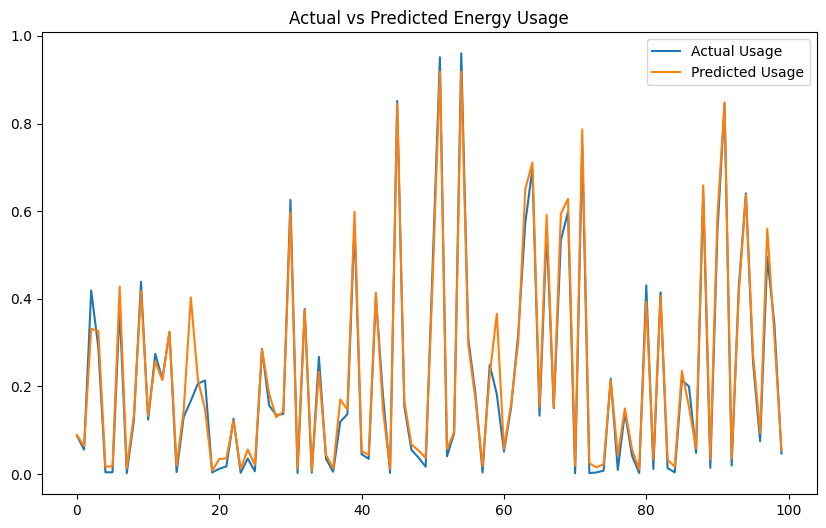

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled[:100], label="Actual Usage")
plt.plot(y_pred_rescaled[:100], label="Predicted Usage")
plt.legend()
plt.title("Actual vs Predicted Energy Usage")
plt.show()


In [51]:
# Save the model
model.save("lstm_energy_forecasting.h5")

In [52]:
import joblib

# Save the scalers after fitting them during training
joblib.dump(scaler_X, 'scaler_X.pkl')  # Save scaler for input features
joblib.dump(scaler_y, 'scaler_y.pkl')  # Save scaler for target variable (Usage)

['scaler_y.pkl']